# Mathematical Modeling and Numerical Simulation of Absorption and Desorption of Hydrogen in Long Metal Hydride Tank Equipped with Phase Change Material Jacket 

## Darzi e.a. - Journal Hydrogen Energy 2016 

For Felix Schuring by Domenico Lahaye. 

## Import Julia Packages 

In [3]:
using LinearAlgebra
using DifferentialEquations
using Plots

## Section 1: Introduction 
The <b>goals</b> of this notebook are:  
1. to reproduce the results by Darzi e.a. in their 2016 paper entitled <i>Absorption and Desorption of Hydrogen in Long Metal Hydride Tank Equipped with Phase Change Material Jacket</i>. This paper discusses the mathematical modeling and numerical simulation of metal-hydride materials for the storage (absorption (intake) and desorption (release)) of hygrogen gas. The [Van 't Hoff plot](https://en.wikipedia.org/wiki/Van_'t_Hoff_equation) is used to estimate the enthalpy (heat intake or release) and entropy of the chemical reaction of binding and release of hydrogen gas; 
2. collect information allowing an informed and critical discussion on future outlook with project partners;   

<img src="./darzi-2016-table1.png" width=800 />
Table-1 from Darzi-2016. 

More on the introduction will come later. 

## Section 2: Solid Density in Spatially Homogenous Reactor 
<b>Assumptions</b>: 
1. the reactor to be spatially homogeneous (well stirred reactor model, reactor has no spatial dimensions); 
2. pressure and temperature of reactor are constant; 
3. given empty bed density $\rho_e$ and $\rho_s$; 

<b>Problem Formulation</b>:

Model time-evolution of density of solid $\rho_s = \rho_s(t)$ in both absorption and desorption conditions, i.e, solve the (single) ordinary differential equation  

$$
(1 - \epsilon) \frac{d \, \rho_s}{dt} = \dot{m}(\rho_s, t) 
\text{ given } \rho_s(t = 0) = \rho_{s,0} \,    
$$

where for <b>absorption</b> conditions (density of solid increases until reaching saturation?)

$$
\dot{m}(\rho_s, t) = \dot{m}_a(\rho_s, t)
                   = C_a \exp(- \frac{E_a}{R \, T}) \, 
                        \log( \frac{p_p}{p_{eq,a}} ) \, (\rho_{sat} - \rho_s(t)) \, ,     
$$

and for <b>desorption</b> conditions (density decreases until reaching minimum value?)

$$
\dot{m}(\rho_s, t) = \dot{m}_d(\rho_s, t)
                   = C_d \exp(- \frac{E_d}{R \, T}) \, 
                         ( \frac{p_p - p_{eq,d}}{p_{eq,d}} ) \, 
                         (\rho_s(t) - \rho_{emp}) \, ,       
$$

assuming final time to evolve between one and a few minutes. 

<b>Coding</b>:

Code the problem set-up and solve using a suitable time-integration choosen from [DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/). Plot time evolution of $\rho_s(t)$ and $\dot{m}$. Explore the sensitivity of the computed solution w.r.t. temperature and pressure operating conditions.   

<b>Absorption Case</b> 
Here we model an absorption case. This case is seperable and can thus be solved analytically using seperation of variables, either using pen-and-paper and symbolic computations (using sympy e.g.). 

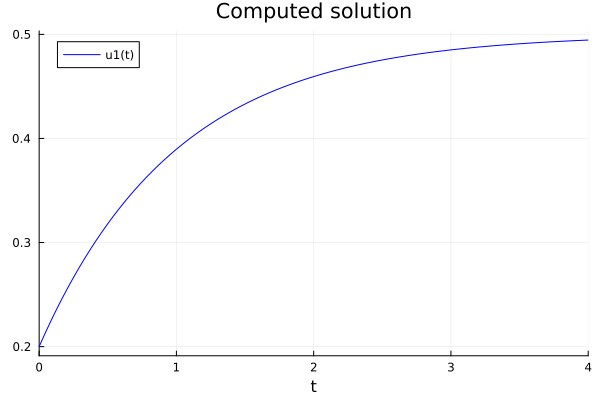

In [4]:
# problem set-up: rhs function that defines the ODE
function rhs(u,p,t)
    return (.5-u) # absorption assuming \rho_{sat} = 1 and multiplying factors equal 1
end 

# problem set-up: initial condition
u0 = .2;

# problem set-up: set time span
Tend = 4
tspan = (0.0,Tend)

# problem set-up: define ODE problem 
prob = ODEProblem(rhs,u0,tspan)

# solve: perform time integration 
sol = solve(prob,AutoVern7(Rodas5()),reltol=1e-4,abstol=1e-4)

# post-process: plot computed solution 
plot(sol, line = :blue,title="Computed solution")

<b>Desorption Case</b> 
Here we model an desorption case.

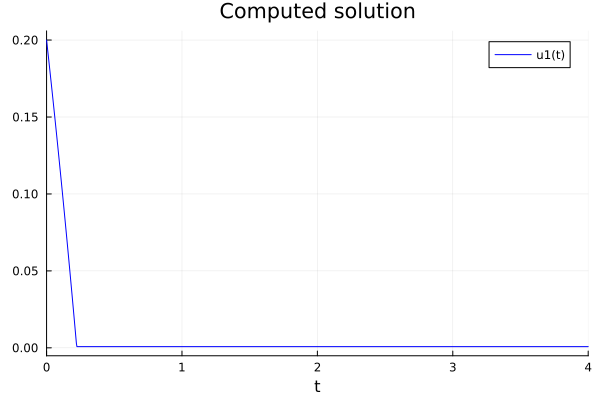

In [5]:
# problem set-up: rhs function that defines the ODE 
function rhs(u,p,t)
    return (u-1)*(u>0.001) # desorption assuming \rho_{emp} = 0.1 and rest equals 1 
end 

# problem set-up: initial condition 
u0 = .2;

# problem set-up: set time span
Tend = 4
tspan = (0.0,Tend)

# problem set-up: define ODE problem 
prob = ODEProblem(rhs,u0,tspan)

# solve: perform time integration 
sol = solve(prob,AutoVern7(Rodas5()),reltol=1e-4,abstol=1e-4)

# post-process: plot computed solution 
plot(sol, line = :blue,title="Computed solution")

In [5]:
# sol

## Section 3: Solid/Gas Density in Spatially Homogenous Reactor

<b>Assumptions</b>: as before 

<b>Problem Formulation</b>:

Model time-evolution of density of solid $\rho_s = \rho_s(t)$ and the gas $\rho_g = \rho_s(t)$  in both absorption and desorption conditions, i.e, solve the two ordinary differential equations coupled via the depency of the flow rate on the 

$$
(1 - \epsilon) \frac{d \, \rho_s}{dt} = \dot{m}(\rho_s, t) 
\text{ given } \rho_s(t = 0) = \rho_{s,0} \,    
$$

and 

$$
\epsilon \frac{d \, \rho_g}{dt} = \dot{m}(\rho_s, t) 
\text{ given } \rho_g(t = 0) = \rho_{g,0} \, .     
$$

<b>Coding</b>: extend before from one to two coupled ordinary differential equations. 

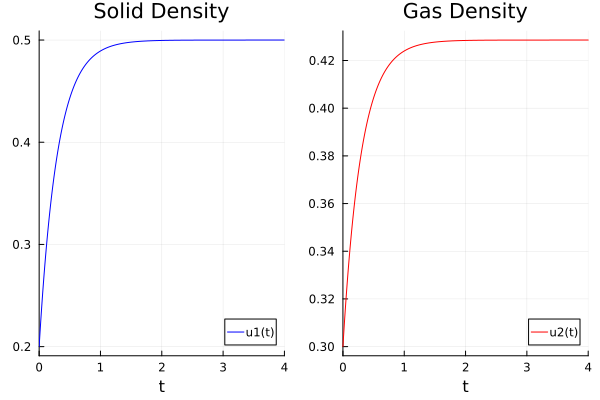

In [36]:
# problem set-up: rhs function that defines the ODE 
function rhs!(du,u,p,t)
 mdot = (.5-u[1])
 epsilon = 0.7 
 du[1] = mdot/(1-epsilon)
 du[2] = mdot/epsilon 
end

# problem set-up: initial condition
u0 = [0.2,0.3] 

# problem set-up: set time span
Tend = 4
tspan = (0.0,Tend)

# problem set-up: define ODE problem
prob = ODEProblem(rhs!,u0,tspan)

# solve: perform time integration
sol = solve(prob)

# post-process: plot computed solution
p1 = plot(sol,idxs=1,line = :blue,title="Solid Density")
p2 = plot(sol,idxs=2,line = :red,title="Gas Density")
plot(p1,p2,layout = (1,2))

## Section 4: Solid/Gas Density with in 1D Plug Flow Reactor 

<b>Assumptions</b>:
1. assume reactor to extend in space along the $z$-axis of a cylindrical coordinate system from $z=0$ to $z = 0.8 \, \text{m}$. 
2. assume $z$-axis to be discretized using an uniform mesh; 
3. assume constant flow $u_z = \, \text{m}/\text{s}$ around the $z$-axis; 

<b>Problem Formulation</b>:

We assume the velocity $u_z(z)$ to be known (a-priori given). 

$$
(1 - \epsilon) \frac{\partial \, \rho_s}{\partial t} = 
D \, \frac{\partial^2 \, \rho_s}{\partial x^2}
+ u_z \, \frac{\partial \, \rho_s}{\partial x} 
+ \dot{m}(\rho_s, t) 
\text{ given } \rho_s(t = 0) = \rho_{s,0} 
\text{ and boundary conditions} \,    
$$

and 

$$
\epsilon \frac{\partial \, \rho_g}{\partial t} = 
D \, \frac{\partial^2 \, \rho_g}{\partial x^2}
+ u_z \, \frac{\partial \, \rho_g}{\partial x} 
+ \dot{m}(\rho_s, t) 
\text{ given } \rho_g(t = 0) = \rho_{g,0} 
\text{ and boundary conditions} \, .     
$$


<b>Coding of Set-up Phase</b>: 

For <b>discretization</b> in space: discretize the diffusion (matrix $S$) and convection (matrix $C$) operator using finite differences on a uniform mesh; 

For <b>discretization</b> in time: using DifferentialEquations.jl as before. See e.g. [EE4375 course](https://github.com/ziolai/finite_element_electrical_engineering/tree/main) for examples. Or use [VoronoiFVM](https://docs.sciml.ai/VoronoiFVM/stable/) instead. See bachelor students report for examples on how to code by encapsulating data in the data type called problem;  

<b>Coding of Set-up Phase</b>:

## Section 5: Solid/Gas Density with in 2D Cylindrical Reactor 

Extend previous analysis from 1D space (only $x$) to 2D space (both $x$ and $y$). See [VoronoiFVM](https://docs.sciml.ai/VoronoiFVM/stable/) for examples. 

<b>Assumptions</b>: 

<b>Problem Formulation</b>:

<b>Coding of Set-up Phase</b>: 

For <b>discretization</b> in space

For <b>discretization</b> in time 

<b>Coding of Set-up Phase</b>:

## Section 6: Pressure/Velocity with in Cylindrical Reactor 

The goal of this section is to implement a laminar flow model for the gas phase in the reactor.

We would like to avoid the complexity of a finite elememt method for fluid flow problems and resort to a finite difference or volume approach instead. 

We can either  
1. implement a staggered finite difference / volume scheme from scratch (see e.g. [Armfield-1991](https://doi.org/10.1016/0045-7930(91)90023-B)) or on top of existing implementation such as [CartesianGrids.jl](https://juliaibpm.github.io/CartesianGrids.jl/latest/manual/finitediff/), [FiniteVolumes.jl](https://github.com/mancellin/FiniteVolumes.jl) or [Kinetic.jl](https://github.com/vavrines/Kinetic.jl);
2. implement a collocated finite difference / volume scheme from scratch; 
3. generate reference solutions using existing flow solvers, e.g. [VoronoiFVM](https://docs.sciml.ai/VoronoiFVM/stable/) or [Oceananigans](https://clima.github.io/OceananigansDocumentation/stable/). How do extend these solvers this appropriate thermodynamics, energy equation and other quantities (density of gas and solid phase to be solved for? 

<b>Assumptions</b>: 

<b>Problem Formulation</b>:

<b>Coding of Set-up Phase</b>: 

For <b>discretization</b> in space

For <b>discretization</b> in time 

<b>Coding of Set-up Phase</b>:

## Section 7: Pressure/Velocity/Temperature with in Cylindrical Reactor

How does temperarture influence the flow field? 

<b>Assumptions</b>: 

<b>Problem Formulation</b>:

<b>Coding of Set-up Phase</b>: 

For <b>discretization</b> in space

For <b>discretization</b> in time 

<b>Coding of Set-up Phase</b>:

## Section 8: Pressure/Velocity/Temperature/Gas-Solid-Density with in Cylindrical Reactor 

<b>Assumptions</b>: 

<b>Problem Formulation</b>:

<b>Coding of Set-up Phase</b>: 

For <b>discretization</b> in space

For <b>discretization</b> in time 

<b>Coding of Set-up Phase</b>:

## Section 9: Conclusions 

## References  

1. [Lyard Fuel Cell Technology](http://www.lyzard.eu/nl/contact)